In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import copy as cp

from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt

import emcee
import corner

from catwoman import catwoman # need to fix weird importing
import ksz.analyse
import ksz.utils
import ksz.Pee
from ksz.parameters import *

In [3]:
plt.rc('font', family='serif')

### Sim 10842

This notebook serves as an introduction to parsing and manipulating data from the suite of LoReLi simulations. Manipulating the data requires the use and installation of two custom librairies, demonstrated here.  These librairies are very much a work in progress so please don't judge them too harshly!

First, we need to load the simulation products.

In [13]:
simu10842 = catwoman.Cat('10842',
                    verbose=True,
                    load_params=True,
                    load_xion=True,
                    load_density=True, 
                    initialise_spectra=True, # This will calculate the Pee, Pbb spectra using powerbox
                    path_sim='/Users/emcbride/kSZ/data')


Loading sim number 10842...
You have told me that data lives in the following places:

params: /Users/emcbride/kSZ/data/simu10842
ionisation cubes: /Users/emcbride/kSZ/data/simu10842/postprocessing/cubes/xion
density cubes: /Users/emcbride/kSZ/data/simu10842/postprocessing/cubes/dens

Fetching reference files...
Fetching redshifts...
Fetching params since you asked so nicely...
Fetching xion cubes since you asked so nicely...
Fetching density cubes since you asked so nicely...

Initialising spectra. This could take a while...

Calculating matter power spectrum at redshift 22.28757
Calculating matter power spectrum at redshift 20.36476
Calculating matter power spectrum at redshift 18.79519
Calculating matter power spectrum at redshift 17.48531
Calculating matter power spectrum at redshift 16.37257
Calculating matter power spectrum at redshift 15.41341
Calculating matter power spectrum at redshift 14.5765
Calculating matter power spectrum at redshift 13.83868
Calculating matter power spe

Now if we want to compare with the Gorce 2022 model, then we want to load that module as well.

In [7]:
model_params = {'alpha_0': 10**(3.93),
                  'kappa': 0.084,
                    'k_f': 9.4,
                      'g': .5}

    
G22 = ksz.Pee.Gorce2022(simu10842.k, simu10842.z, simu10842.xe,
                              model_params=model_params, verbose=True)

Initialising Gorce2022 parameterisation...

z: [22.28757  20.36476  18.79519  17.48531  16.37257  15.41341  14.5765
 13.83868  13.18242  12.59418  12.06334  11.58143  11.14162  10.73831
 10.36687  10.02347   9.704856  9.408288  9.13142   8.872238  8.629
  8.400191  8.184488  7.980729  7.787888  7.605059  7.431433  7.266291
  7.108987  6.958943  6.815635  6.678593  6.547388  6.421631]
k: [0.02122698 0.03001948 0.0367662  0.04646276 0.0546765  0.06941988
 0.08744014 0.10820628 0.13344554 0.16715673 0.20797769 0.25750477
 0.32042243 0.39744635 0.49332382 0.61253852 0.76014032 0.94353667
 1.17116104 1.45359425 1.80412152 2.23907465 2.75857627 3.36606503
 4.00295368]
xe: [1.32723170e-04 1.31946357e-04 1.31432484e-04 1.31470937e-04
 1.33225439e-04 1.38801689e-04 1.51599624e-04 1.76594794e-04
 2.20405126e-04 2.91151661e-04 3.98122631e-04 5.51725448e-04
 7.65812865e-04 1.05959731e-03 1.46783770e-03 2.07410758e-03
 3.05626296e-03 4.74126690e-03 7.74956641e-03 1.30850847e-02
 2.22173259e-02 3.71

Now we can plot all these things and look at them.

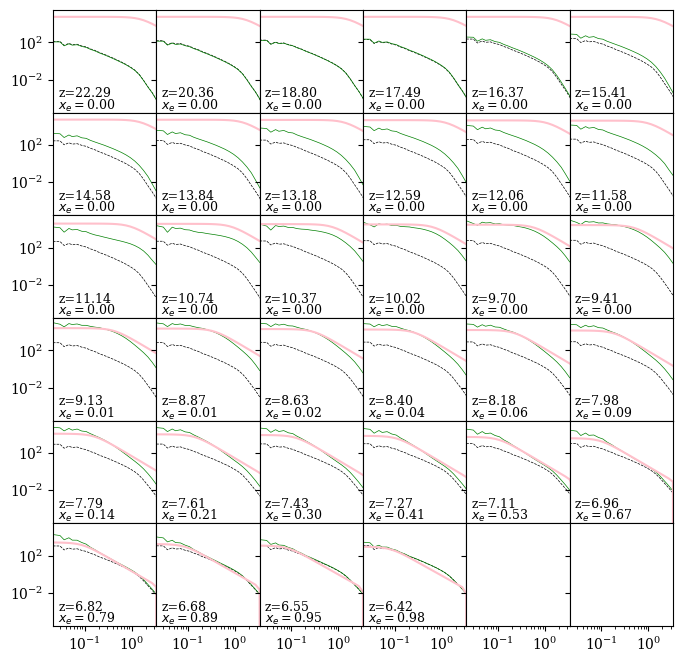

In [10]:
# DON'T FORGET TO CHANGE THE VARIABLES
sim_n = '10842'
fig, ax = plt.subplots(6,6, sharex=True, sharey=True, figsize=(8,8))

ax = ax.flatten()

# The LoReLi Pee spectra are stored in a dict per redshift,
# so we need to parse through it

for i, p in enumerate(simu10842.Pee):
    z = p['z']
    k = p['k'] # or you can just access this directly via the class variable simu10842.k
    pee = p['P_k']
    pbb = simu10842.Pbb[i]['P_k']
    xe = simu10842.xe[i]

    ax[i].annotate(f"z={z:.2f}", (0.05,.15), xycoords='axes fraction', fontsize=9)
    ax[i].annotate(rf"$x_e=${xe:.2f}", (0.05,.03), xycoords='axes fraction', fontsize=9)


    ax[i].loglog(k, pbb, color='black', alpha=1., ls='--', lw=.5)
    ax[i].loglog(k, pee, color='green', alpha=1., lw=.5)
    ax[i].loglog(k, G22.spectra[i], color='pink', alpha=1.) # The spectra shape is (z.size, k.size)


ax[0].set_xlim(simu10842.k[0], simu10842.k[-2])

fig.subplots_adjust(wspace=0, hspace=0)